In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

seattle_scraped = pd.read_csv('./Seattle/scraped.csv')
pd.set_option('display.max_columns', None)  
seattle_scraped.head()

/anaconda3/envs/Datascience_blog/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20190922030624,2019-09-22,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,Madrona is a hidden gem of a neighborhood. It ...,"We adhere to a 10pm -9am quiet hour schedule, ...",NaN,Guests can access any part of the house.,We are a family who live next door and are ava...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/02973ad3-a...,NaN,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/016a1...,https://a0.muscache.com/im/pictures/user/016a1...,Minor,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.61082,-122.29082,t,House,Entire home/apt,9,2.5,4.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$296.00,NaN,NaN,$500.00,$250.00,8,$25.00,30,1000,30,30,1000,1000,30.0,1000.0,5 days ago,t,25,55,84,84,2019-09-22,28,8,2008-09-15,2019-08-30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{WASHINGTON,"" Seattle"","" WA""}",f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.21
1,5682,https://www.airbnb.com/rooms/5682,20190922030624,2019-09-22,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,My personal favorite places to dine are: • Ma...,Bus 120 is right outside and goes into downtow...,PRIVATE ENTRANCE WITH PRIVATE BATH Queen size ...,"I'm more than happy to meet with guests, but u...",**PLEASE READ** NO SMOKING NO VAPING NO MARIJU...,NaN,NaN,https://a0.muscache.com/im/pictures/5ec89f9d-8...,NaN,8993,https://www.airbnb.com/users/show/8993,Maddy,2009-03-03,"Seattle, Washington, United States",Hello my name is Maddy. I enjoy meeting and ho...,NaN,NaN,NaN,t,https://a0.muscache.com/im/users/8993/profile_...,https://a0.muscache.com/im/users/8993/profile_...,South Delridge,1.0,1.0,"['email'

In [3]:
seattle_scraped.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.040000e+03,9.040000e+03,0.0,0.0,0.0,9.040000e+03,0.0,9038.000000,9038.000000,9040.000000,9040.000000,9040.000000,9040.000000,9039.000000,9037.000000,407.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,7682.000000,7680.000000,7680.000000,7679.000000,7681.00000,7679.000000,7680.000000,9040.000000,9040.000000,9040.000000,9040.000000,7741.000000
mean,2.098044e+07,2.019092e+13,NaN,NaN,NaN,5.923561e+07,NaN,126.545253,126.545253,47.625582,-122.333773,3.651106,1.308352,1.372497,1.904614,696.980344,1.982854,4.809292,607.608186,4.486394,5.635841,602.332080,605.420796,5.098595,603.591770,10.189602,25.690376,41.675664,139.407301,48.868363,17.488717,95.229758,9.738151,9.640755,9.819247,9.82320,9.802448,9.517448,32.322345,28.157412,1.431969,0.659403,2.379393
std,1.082978e+07,0.000000e+00,NaN,NaN,NaN,7.073362e+07,NaN,381.021754,381.021754,0.045495,0.031482,2.289956,0.654346,1.016505,1.572850,330.843220,1.671704,14.550328,543.002508,14.375961,15.581040,543.399623,543.038810,14.729447,543.005369,10.342369,21.986550,33.763540,132.205957,73.261488,23.981072,6.981828,0.711963,0.747078,0.641241,0.63224,0.570997,0.770911,77.902838,76.235411,7.305483,5.141889,2.285433
min,2.318000e+03,2.019092e+13,NaN,NaN,NaN,2.000000e+01,NaN,0.000000,0.000000,47.495870,-122.419250,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.303175e+07,2.019092e+13,NaN,NaN,NaN,8.534462e+06,NaN,1.000000,1.000000,47.605620,-122.353913,2.000000,1.000000,1.000000,1.000000,600.000000,1.000000,1.000000,29.000000,1.000000,2.000000,29.000000,29.000000,1.100000,29.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,94.000000,10.000000,9.000000,10.000000,10.00000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.500000
50%,2.144738e+07,2.019092e+13,NaN,NaN,NaN,2.905126e+07,NaN,2.000000,2.000000,47.620215,-122.332520,3.000000,1.000000,1.000000,1.000000,600.000000,1.000000,2.000000,1124.000000,2.000000,2.000000,1124.000000,1124.000000,2.000000,1124.000000,7.000000,26.000000,49.000000,91.000000,18.000000,6.000000,97.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.670000
75%,3.020446e+07,2.019092e+13,NaN,NaN,NaN,8.296168e+07,NaN,10.750000,10.750000,47.659770,-122.312377,4.000000,1.500000,2.000000,2.000000,975.000000,2.000000,3.000000,1125.000000,2.000000,3.000000,1125.000000,1125.000000,3.000000,1125.000000,19.000000,46.000000,73.000000,265.000000,65.000000,27.000000,99.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,8.000000,4.000000,1.000000,0.000000,3.700000
max,3.879903e+07,2.019092e+13,NaN,NaN,NaN,2.961044e+08,NaN,1795.000000,1795.000000,47.735770,-122.234800,28.000000,16.000000,8.000000,49.000000,2750.000000,16.000000,400.000000,10000.000000,400.000000,400.000000,10000.000000,10000.000000,400.00000

In [4]:
seattle_scraped['review_scores_accuracy'].describe()

count    7680.000000
mean        9.738151
std         0.711963
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: review_scores_accuracy, dtype: float64

In [5]:
seattle_scraped.review_scores_accuracy.isna().mean()

0.1504424778761062

In [6]:
seattle_scraped.review_scores_cleanliness.isna().mean()

0.1504424778761062

In [7]:
seattle_scraped.review_scores_location.isna().mean()

0.15055309734513275

In [8]:
seattle_scraped.review_scores_value	.isna().mean()

0.1504424778761062

In [25]:
seattle_scraped.groupby('neighbourhood_group_cleansed')['review_scores_location'].mean().sort_values(ascending=False)

neighbourhood_group_cleansed
West Seattle           9.948956
Capitol Hill           9.918072
Queen Anne             9.909420
Ballard                9.903302
Other neighborhoods    9.836022
Magnolia               9.823129
Downtown               9.817671
Cascade                9.802198
Seward Park            9.775000
Central Area           9.771034
Lake City              9.710145
Interbay               9.666667
Beacon Hill            9.616162
University District    9.606218
Delridge               9.594262
Rainier Valley         9.575309
Northgate              9.505208
Name: review_scores_location, dtype: float64

In [10]:
seattle_scraped[seattle_scraped["neighbourhood_group_cleansed"]=="University District"]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
154,635878,https://www.airbnb.com/rooms/635878,20190922030624,2019-09-22,Center UW Spacious 2 Beds (203),It has a Walk Score of 98 out of 100. This loc...,Large clean furnished studio on the top floor...,It has a Walk Score of 98 out of 100. This loc...,none,It is located in the bustling and vibrant Univ...,It is on the 2nd floor in an intercom access b...,Right at the corner of Brooklyn Ave and 45th s...,Coin operated Laundry room with 6 new Maytag w...,I am laid back but act quickly to meet your need.,"*No smoking, that includes no hookah, no weeds...",NaN,NaN,https://a0.muscache.com/im/pictures/79114056/e...,NaN,3074414,https://www.airbnb.com/users/show/3074414,Melissa,2012-07-27,"Seattle, Washington, United States",Used to be a professor (Ph.D. in Political Eco...,within an hour,90%,NaN,f,https://a0.muscache.com/im/users/3074414/profi...,https://a0.muscache.com/im/users/3074414/profi...,University District,62.0,62.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Seattle, WA, United States",University District,University District,University District,Seattle,WA,98105,Seattle,"Seattle, WA",US,United States,47.66154,-122.31359,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Wifi,Kitchen,""Paid parking off premises"",""Buz...",NaN,$89.00,$680.00,"$1,850.00",$100.00,$60.00,1,$20.00,81,1125,81,81,1125,1125,81.0,1125.0,a week ago,t,30,60,90,269,2019-09-22,28,0,2013-07-19,2018-08-18,81.0,9.0,9.0,9.0,9.0,9.0,8.0,t,NaN,"{WASHINGTON,"" Seattle"","" WA""}",f,f,moderate,f,f,53,49,4,0,0.37
217,977722,https://www.airbnb.com/rooms/977722,20190922030624,2019-09-22,serene apartment close to UW,This is a basement unit with shoji screened wi...,Enter a peaceful space in the lower unit of a ...,This is a basement unit with shoji screened wi...,none,This is a wonderful walking neighborhood. Not...,City of Seattle Customer # (Phone number hidde...,"From the airport or the train station, you may...",Private entry. Shared laundry facility with ow...,I am close by if there is a problem.,To insure that the place is left reasonably in...,NaN,NaN,https://a0.muscache.com/im/pictures/14739245/e...,NaN,5282519,https://www.airbnb.com/users/show/5282519,Elizabeth,2013-03-01,"Seattle, Washington, United States",I am a transplant from Massac

In [11]:
seattle_scraped.loc[seattle_scraped['neighbourhood_group_cleansed'] == "West Seattle"][["room_type", "bed_type", "bathrooms"]]

,room_type,bed_type,bathrooms
5,Entire home/apt,Real Bed,1.0
6,Entire home/apt,Real Bed,1.0
8,Entire home/apt,Real Bed,2.0
13,Entire home/apt,Real Bed,1.0
36,Private room,Real Bed,1.0
...,...,...,...
9005,Entire home/apt,Real Bed,2.5
9008,Entire home/apt,Real Bed,1.0
9030,Private room,Real Bed,1.0
9033,Private room,Real Bed,1.0


In [12]:
seattle_scraped.groupby('neighbourhood_group_cleansed')['bathrooms'].mean().sort_values(ascending=False)

neighbourhood_group_cleansed
Central Area           1.454265
Queen Anne             1.403101
Magnolia               1.390909
West Seattle           1.372141
Beacon Hill            1.365506
Capitol Hill           1.358065
Ballard                1.343949
Seward Park            1.329545
Other neighborhoods    1.329370
Delridge               1.308271
Lake City              1.294702
University District    1.290984
Rainier Valley         1.286713
Cascade                1.213004
Northgate              1.212963
Downtown               1.156438
Interbay               1.038462
Name: bathrooms, dtype: float64

In [13]:
seattle_scraped.groupby('neighbourhood_group_cleansed')['bed_type'].count().sort_values(ascending=False)

neighbourhood_group_cleansed
Other neighborhoods    1682
Downtown               1662
Capitol Hill            930
Central Area            809
Queen Anne              645
West Seattle            481
Ballard                 471
Cascade                 446
Rainier Valley          429
Beacon Hill             316
Delridge                266
University District     244
Northgate               216
Magnolia                165
Lake City               151
Seward Park              88
Interbay                 39
Name: bed_type, dtype: int64

In [23]:
pd.set_option('display.max_rows', None)  
seattle_scraped.groupby(['neighbourhood_group_cleansed', 'property_type']).size()

neighbourhood_group_cleansed  property_type     
Ballard                       Apartment               84
                              Boat                     1
                              Boutique hotel           1
                              Bungalow                12
                              Camper/RV                2
                              Condominium             12
                              Cottage                  8
                              Guest suite             64
                              Guesthouse              25
                              House                  172
                              Loft                     6
                              Serviced apartment       1
                              Tent                     1
                              Tiny house               3
                              Townhouse               79
Beacon Hill                   Apartment               38
                              Bungalow 

<Figure size 4320x4320 with 0 Axes>

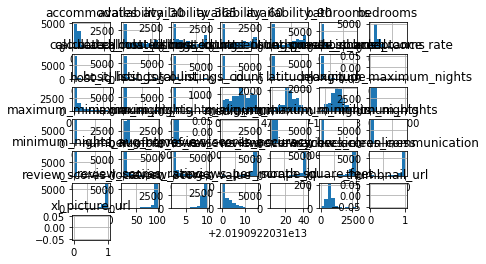

In [39]:
plt.figure(figsize=(60,60))
seattle_scraped.hist();

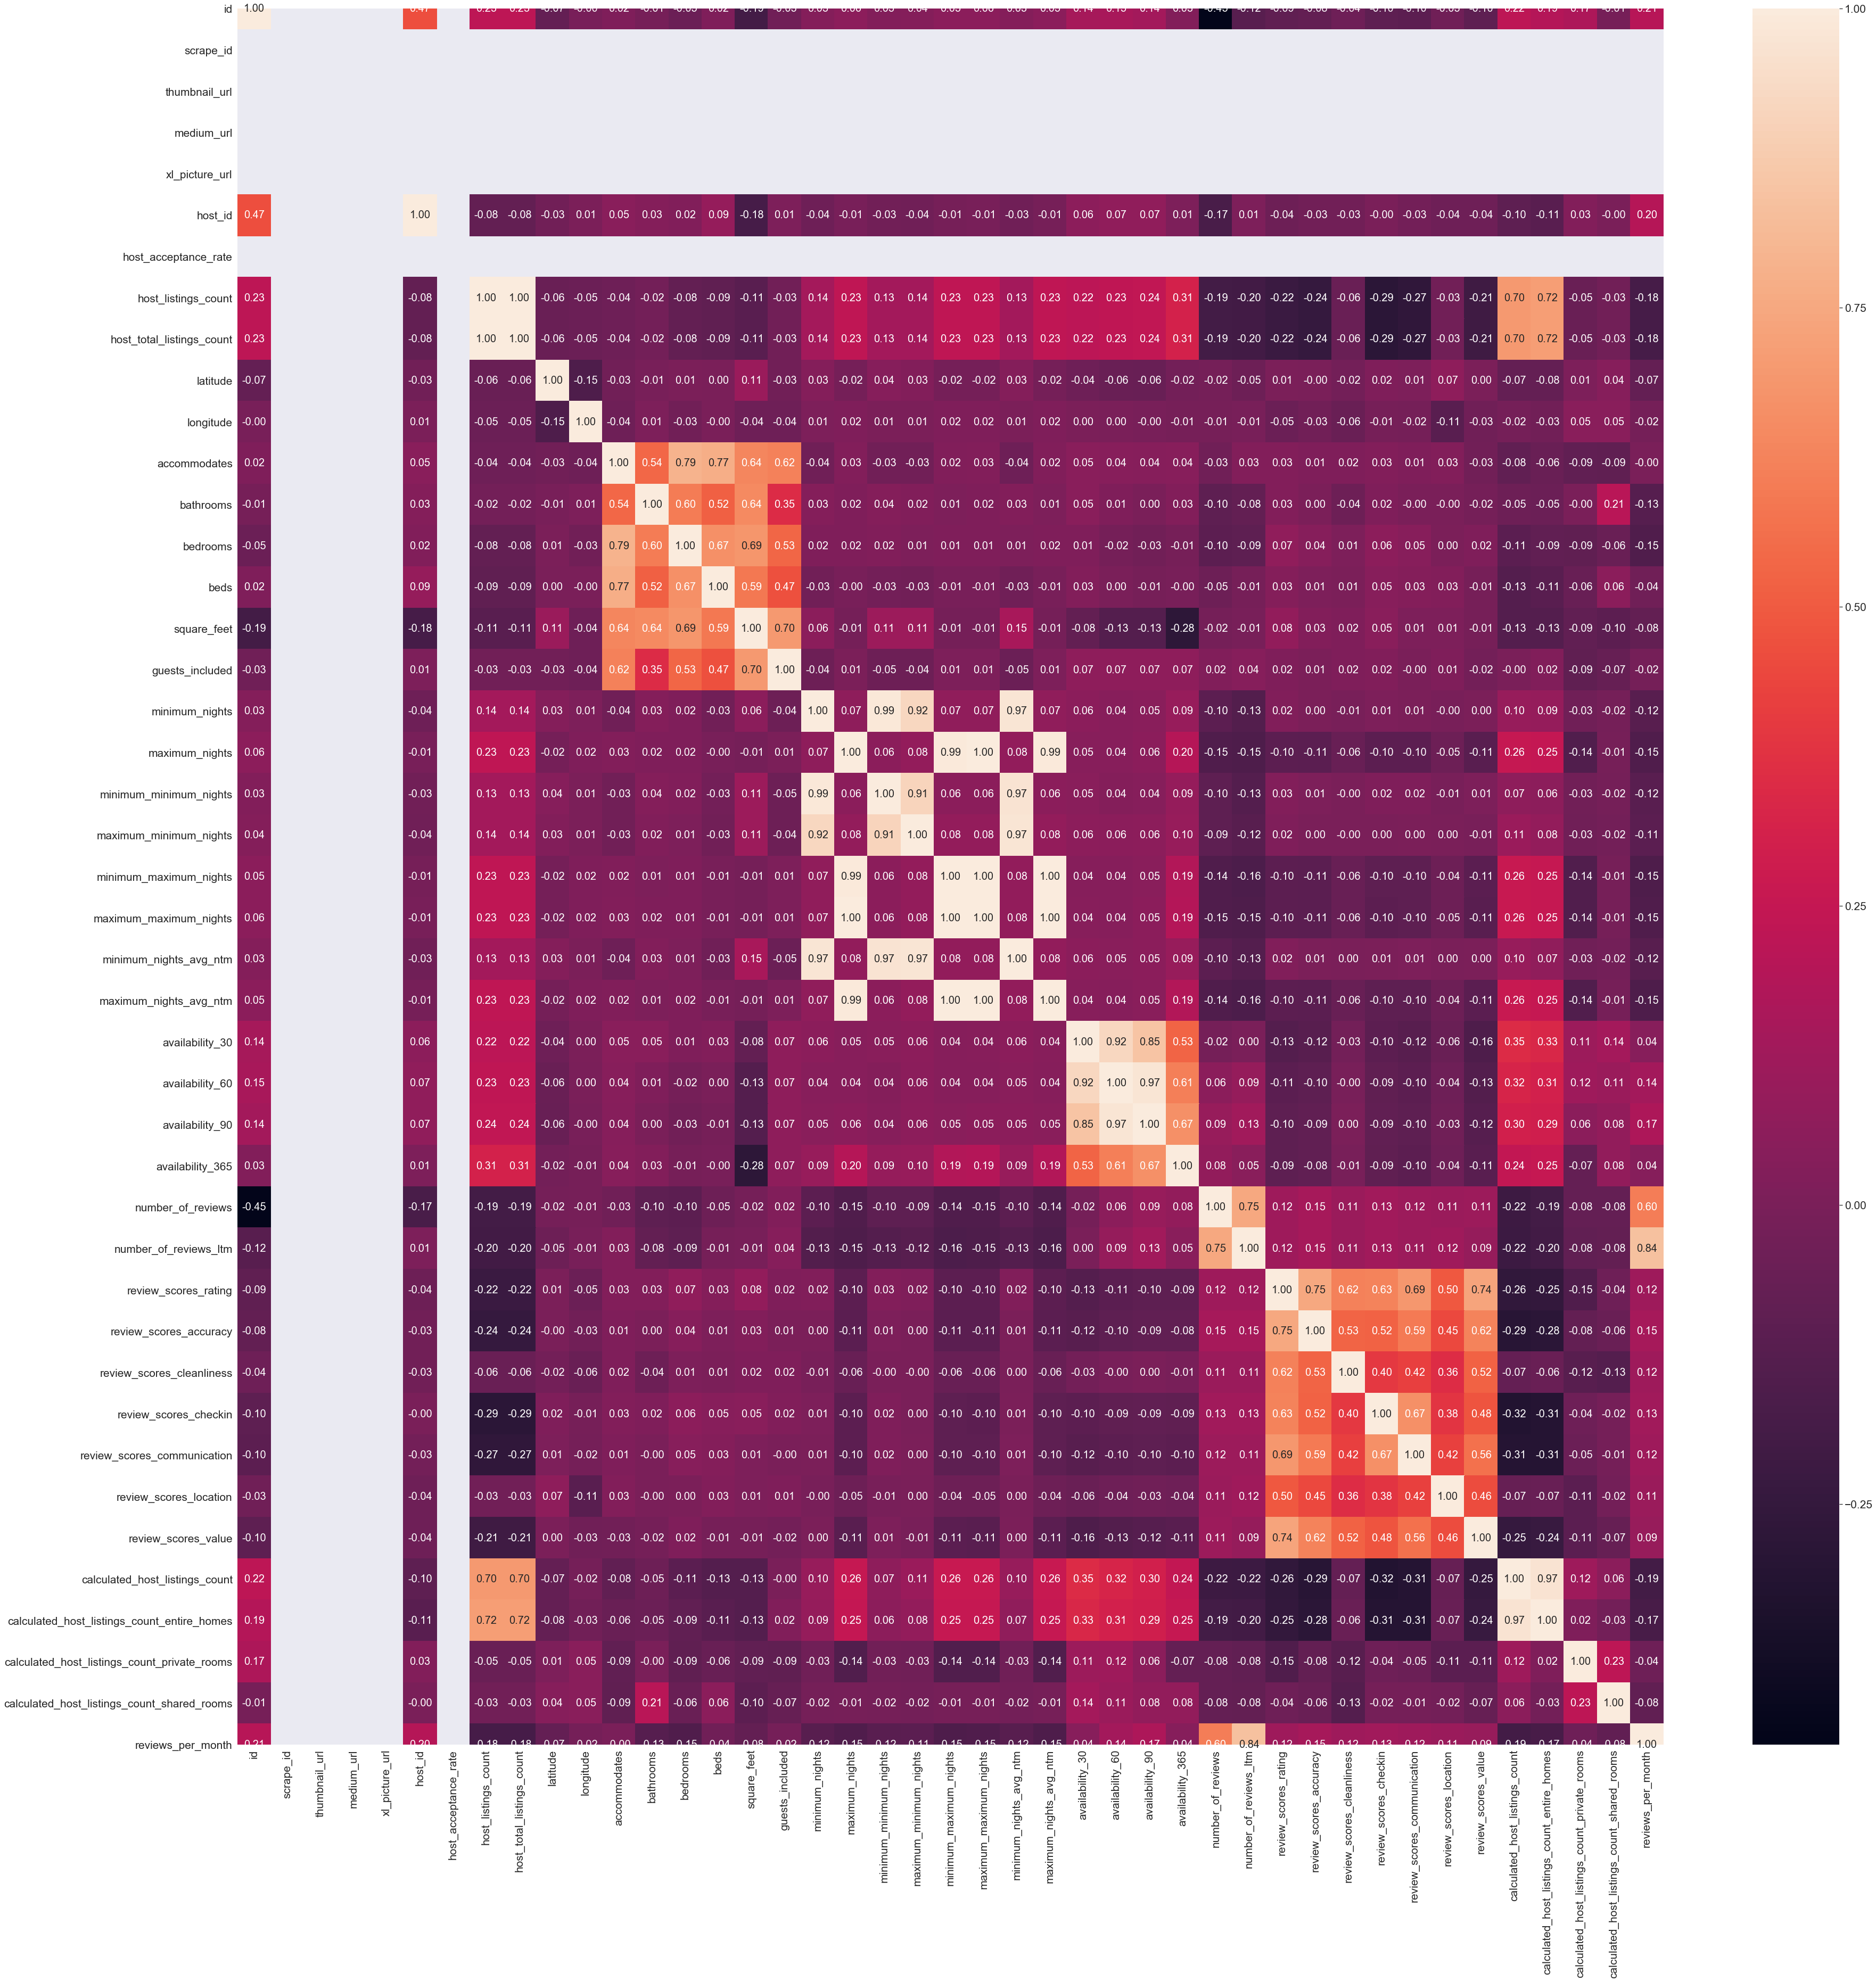

In [51]:
plt.figure(figsize=(60,60))
sns.set(font_scale=1.9) 
sns.heatmap(seattle_scraped.corr(), annot=True, fmt=".2f", annot_kws={"size": 20});